# Images augmentation

A lot of deep learning project are about processing images. A famous example which is still in development is to create a AI model to translate images from scientific papers to latex or markdown code equivalent. Unfortunately, the papers you will want to translate are not perfect, they can be a little blurred, having some rotation, deformation, and so on. For example, scanned paper or images are often imperfect. This highlight the fact that AI models have to be trained on data comporting a part of imperfections.

The goal of this tutorial is to introduce some methods to add modifications to images. The modification are inspired by this paper: https://arxiv.org/pdf/2308.13418

![alt text](images/ex1_original.png "Title")
![alt text](images/ex1_blur.png "Title")

All the transformation are using the python package named Albumentation.

Here is a list of possible imperfection that may appear in images:
 - Dilatation : `Morphological(operation='dilation')`
 - Grid distortion : `GridDistortion()`
 - Image compression : `ImageCompression()`
 - Affine transformation : `Affine()`
 - Erosion : `Morphological(operation='erosion')`
 - Shift scale rotation : `Affine()` with some options you want
 - Brightness contrast : `RandomBrightnessContrast()`
 - Blur : `Blur()`

## 1. Openning and displaying images

To open images, we will use the "cv2" python packages and to open and save images. We will also use the "matplotlib.pyplot" package to display images.

In [3]:
import cv2 # to read and save images
import matplotlib.pyplot as plt # to display images

TODO: open the "images/ex1_original.png" image and display it.

### Solution:

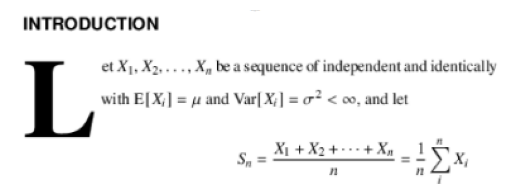

In [4]:
dir_path = "images/"

image = cv2.imread(dir_path + "ex1_original.png")

plt.imshow(image)
plt.axis("off")
plt.show()

Note that the `image` variable is a numpy array of rbg color.

In [5]:
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(138, 393, 3)


## 2. Apllying transformations

To install the albumentation packages, write `pip install -U albumentations` in your terminal (see https://albumentations.ai/docs/ for more explanations).

Note thathe we have to use the `cv2.cvtColor`` function to open a image. In fact, for historical reasons, OpenCV reads an image in BGR format (color channels of the image have the following order: Blue, Green, Red). Nevertheless, Albumentations packages uses the most common and popular RGB image format. So when using OpenCV, we need to convert the image format to RGB explicitly.

In [6]:
original_image = cv2.imread(dir_path + "ex1_original.png")
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

Then, we can apply transformation using albumentations class named `Compose` which take a list a albumentations transformation with their probability to occurs.

In [12]:
import albumentations as A

transform = A.Compose([
    A.HorizontalFlip(p=1) # Flip the image with probability 1
    ])

transformed = transform(image=original_image)
# transformed is a dictionnary containing a unique keys
print(type(transformed), transformed.keys())

<class 'dict'> dict_keys(['image'])


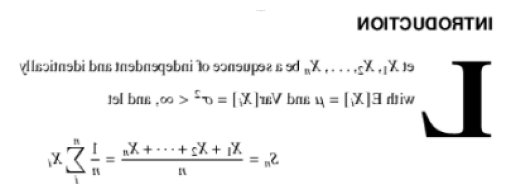

In [13]:
transformed_image = transformed['image']

plt.imshow(transformed_image)
plt.axis("off")
plt.show()

To plot both original and transformed image next to each other you can use the following function.

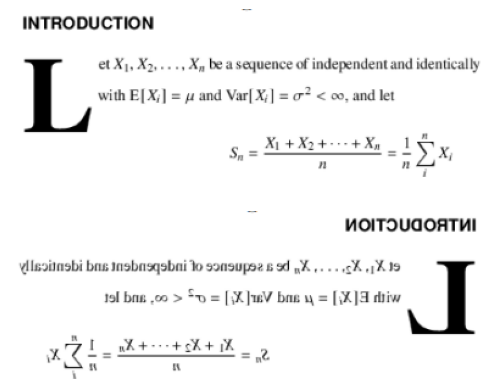

In [14]:
def plot_2_images(original, transformed):
    f, axarr = plt.subplots(2) # We are dividing the plot screeen into 2 parts
    axarr[0].imshow(original)
    axarr[0].axis("off")
    axarr[1].imshow(transformed)
    axarr[1].axis("off")
    plt.show()

plot_2_images(original_image, transformed_image)

## 3. Saving images

To save images you can use the `cv2.imwrite` function.

TODO: save the fliped images of part 2.

### Solution

In [15]:
cv2.imwrite(dir_path + "ex1_flip.png", transformed_image)

True

## 4. Tutorial

TODO: using the random python packages, create $N$ images with random scale, shift and rotation transformation. Then plot them all at ones.

### Solution

First, we will create a function that return a transformed images wit arbitrary (pseudo realistic) parameters.

In [16]:
import random as rd

def generate_shift_scale_rotate_image(img):
    # scale is a float between 0 and 1
    # But here, we only want a scale that is between 0.8 and 1
    rd_scale = rd.random()/5 + 0.8

    # rotate is a float between -360 and 360
    # But here, we only wants rotations bewteen -20 and 20
    rd_rotate = rd.randint(-20, 20)

    # translate_percent is a float between 0 and 1
    # But here, we only wants rotations bewteen 0 and 20
    rd_translation = rd.random()/5
    
    transform = A.Compose([
        A.Affine(p=1, 
            scale=rd_scale,
            rotate=rd_rotate,
            translate_percent=rd_translation)
        ])
    return transform(image=img)["image"]

Then we will create a function that plot every images from a list in a square sufficiently large to fit all images.

Note that if the list is composed of $N$ images, we want the smallest integer $n$ such that $n^2 \geq N$.

Therefore, we will take $n = \lceil \sqrt{N} \rceil$

In [17]:
import math

def plot_images(images_list):
    N = len(images_list)
    n = int(math.ceil(math.sqrt(N)))

    f, axarr = plt.subplots(n,n) # We are dividing the plot screeen into n x n parts
    for i in range(n):
        for j in range(n):
            if i*n +j < len(images_list): # Test if there is still images to plot
                axarr[i][j].imshow(images_list[i*n +j])
            axarr[i][j].axis("off")
    plt.show()

Finally, we can generate and plot our images.

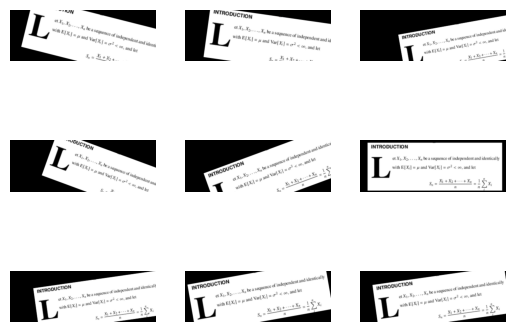

In [18]:
N = 9
transformed_images = [generate_shift_scale_rotate_image(original_image) for _ in range(N)]
plot_images(transformed_images)